In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax

In [ ]:
!kaggle datasets download -d ananthu017/emotion-detection-fer

Dataset URL: https://www.kaggle.com/datasets/ananthu017/emotion-detection-fer
License(s): CC0-1.0
 95% 62.0M/65.2M [00:00<00:00, 82.2MB/s]
100% 65.2M/65.2M [00:00<00:00, 79.5MB/s]


In [ ]:
import zipfile
import os

with zipfile.ZipFile('emotion-detection-fer.zip', 'r') as zip_ref:
    zip_ref.extractall('emotion_detection_data')

# List the extracted files
os.listdir('emotion_detection_data')


['train', 'test']

In [ ]:
train_dir = "/content/emotion_detection_data/train"
test_dir = "/content/emotion_detection_data/test"

In [ ]:
model= tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(512,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
img_size=48

In [ ]:
train_datagen = ImageDataGenerator(width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,
                                         rescale = 1./255,
                                         validation_split = 0.2
                                        )
validation_datagen = ImageDataGenerator(rescale = 1./255,
                                         validation_split = 0.2)

In [ ]:
train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (img_size,img_size),
                                                    batch_size = 64,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    subset = "training"
                                                   )
validation_generator = validation_datagen.flow_from_directory( directory = test_dir,
                                                              target_size = (img_size,img_size),
                                                              batch_size = 64,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                              subset = "validation"
                                                             )

Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


In [ ]:
model.compile(
    optimizer = Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
  )

In [ ]:
epochs = 45
batch_size = 64

In [ ]:
history = model.fit(x = train_generator,epochs = epochs,validation_data = validation_generator)

Epoch 1/45


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


359/359 ━━━━━━━━━━━━━━━━━━━━ 55s 95ms/step - accuracy: 0.2063 - loss: 2.2457 - val_accuracy: 0.2500 - val_loss: 2.0386
Epoch 2/45
359/359 ━━━━━━━━━━━━━━━━━━━━ 53s 59ms/step - accuracy: 0.2758 - loss: 1.8414 - val_accuracy: 0.3184 - val_loss: 1.7195
Epoch 3/45
359/359 ━━━━━━━━━━━━━━━━━━━━ 20s 56ms/step - accuracy: 0.3903 - loss: 1.5802 - val_accuracy: 0.3715 - val_loss: 1.6135
Epoch 4/45
359/359 ━━━━━━━━━━━━━━━━━━━━ 21s 57ms/step - accuracy: 0.4728 - loss: 1.3749 - val_accuracy: 0.4888 - val_loss: 1.3342
Epoch 5/45
359/359 ━━━━━━━━━━━━━━━━━━━━ 40s 54ms/step - accuracy: 0.5071 - loss: 1.2842 - val_accuracy: 0.5363 - val_loss: 1.2281
Epoch 6/45
359/359 ━━━━━━━━━━━━━━━━━━━━ 21s 56ms/step - accuracy: 0.5355 - loss: 1.2185 - val_accuracy: 0.5447 - val_loss: 1.1922
Epoch 7/45
359/359 ━━━━━━━━━━━━━━━━━━━━ 20s 56ms/step - accuracy: 0.5496 - loss: 1.1882 - val_accuracy: 0.5698 - val_loss: 1.1637
Epoch 8/45
359/359 ━━━━━━━━━━━━━━━━━━━━ 21s 58ms/step - accuracy: 0.5564 - loss: 1.1569 - val_accurac

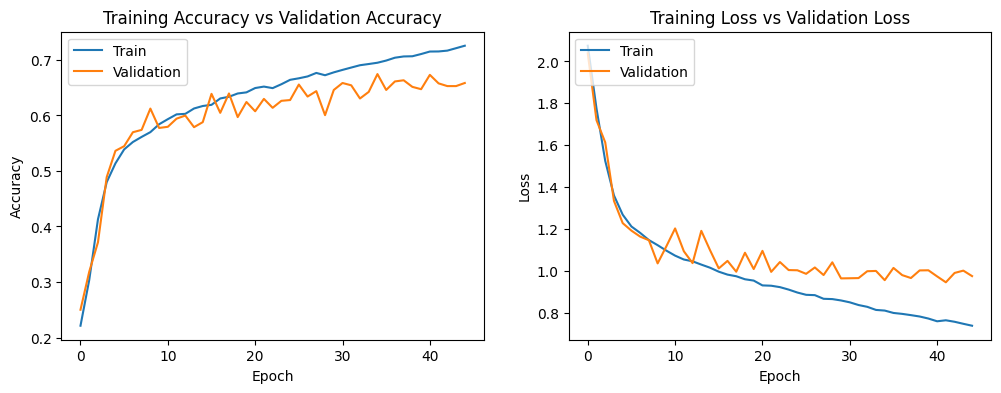

In [ ]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [ ]:
model.save_weights('model_weights_fer.weights.h5')

In [ ]:
# Menyimpan model ke file .h5
model.save('model_emosi.h5')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: 

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

img_height = 48
img_width = 48

# Preprocess the input image
def preprocess_image(image_path):
    img = load_img(image_path, color_mode='grayscale', target_size=(img_height, img_width))
    img_array = img_to_array(img)
    img_array = img_array / 255.0  # Normalize pixel values
    img_array = tf.expand_dims(img_array, 0)  # Add batch dimension
    return img_array

def predict_emotion_with_image(image_path):
    # Load and display the image
    img = load_img(image_path, color_mode='grayscale', target_size=(img_height, img_width))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()

    # Preprocess the image
    preprocessed_img = preprocess_image(image_path)

    # Make predictions
    predictions = model.predict(preprocessed_img)
    predicted_class = tf.argmax(predictions[0]).numpy()

    return predicted_class


def class_to_emotion(predicted_emotion):
    res_dict = {0: 'angry',
                1: 'disgusted',
                2: 'fearful',
                3: 'happy',
                4: 'neutral',
                5: 'sad',
                6: 'surprised'
               }

    return res_dict[predicted_emotion]

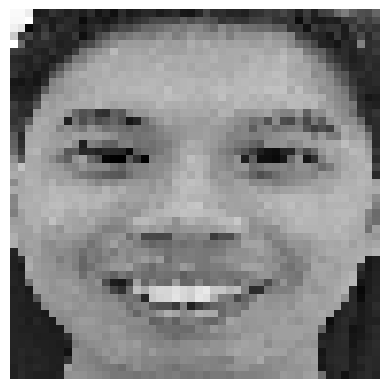

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 982ms/step
Predicted emotion class: happy


In [ ]:
image_path = "/content/Happy-Crop.jpg"
predicted_emotion = predict_emotion_with_image(image_path)
print("Predicted emotion class:", class_to_emotion(predicted_emotion))

# LOAD MODEL

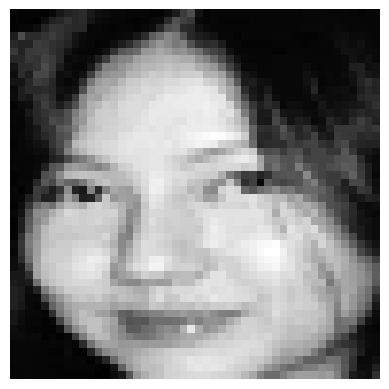

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step
Predicted emotion class: happy


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

# Memuat bobot ke dalam model
model = tf.keras.models.load_model('/content/drive/MyDrive/FER/CNN-7/model_emosi.h5')

img_height = 48
img_width = 48

# Preprocess the input image
def preprocess_image(image_path):
    img = load_img(image_path, color_mode='grayscale', target_size=(img_height, img_width))
    img_array = img_to_array(img)
    img_array = img_array / 255.0  # Normalize pixel values
    img_array = tf.expand_dims(img_array, 0)  # Add batch dimension
    return img_array

def predict_emotion_with_image(image_path):
    # Load and display the image
    img = load_img(image_path, color_mode='grayscale', target_size=(img_height, img_width))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()

    # Preprocess the image
    preprocessed_img = preprocess_image(image_path)

    # Make predictions
    predictions = model.predict(preprocessed_img)
    predicted_class = tf.argmax(predictions[0]).numpy()

    return predicted_class

def class_to_emotion(predicted_emotion):
    res_dict = {0: 'angry',
                1: 'disgusted',
                2: 'fearful',
                3: 'happy',
                4: 'neutral',
                5: 'sad',
                6: 'surprised'
               }

    return res_dict[predicted_emotion]

# Path gambar untuk prediksi
image_path = "/content/Screenshot 2024-10-04 090923.png"

# Prediksi emosi berdasarkan gambar
predicted_emotion = predict_emotion_with_image(image_path)
print("Predicted emotion class:", class_to_emotion(predicted_emotion))


# ONNX

In [ ]:
!pip install tf2onnx
!pip install onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 75.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 8.4 MB/s eta 0:00:00


In [ ]:
# Memuat model Keras dari file .h5
model = tf.keras.models.load_model('/content/drive/MyDrive/FER/CNN-7/model_emosi.h5')
tf.saved_model.save(model, "tmp_model")

In [ ]:
!python3 -m tf2onnx.convert --saved-model tmp_model --output "model.onnx"

/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'tf2onnx.convert' found in sys.modules after import of package 'tf2onnx', but prior to execution of 'tf2onnx.convert'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
I0000 00:00:1728010381.408451   13081 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1728010381.485450   13081 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1728010381.485781   13081 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA n

In [ ]:
import onnxruntime as ort
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import time  # Import modul time

# Memuat model ONNX
onnx_model_path = 'model.onnx'  # Pastikan nama file sesuai
session = ort.InferenceSession(onnx_model_path)

# Fungsi untuk preprocess gambar
def preprocess_image(image_path):
    img = load_img(image_path, color_mode='grayscale', target_size=(48, 48))
    img_array = img_to_array(img)
    img_array = img_array / 255.0  # Normalisasi pixel
    img_array = np.expand_dims(img_array, axis=0)  # Tambah batch dimension
    return img_array

# Melakukan prediksi dengan model ONNX
def predict_emotion_with_onnx(image_path):
    # Preprocess gambar
    preprocessed_img = preprocess_image(image_path)

    # Mendapatkan nama input dan output dari model
    input_name = session.get_inputs()[0].name
    output_name = session.get_outputs()[0].name

    # Mengukur waktu mulai
    start_time = time.time()

    # Melakukan inferensi dengan ONNX
    result = session.run([output_name], {input_name: preprocessed_img.astype(np.float32)})

    # Mengukur waktu selesai
    end_time = time.time()

    # Menghitung durasi dalam milidetik
    processing_time_ms = (end_time - start_time) * 1000  # Menghitung waktu dalam ms

    predicted_class = np.argmax(result[0])

    return predicted_class, processing_time_ms

def class_to_emotion(predicted_emotion):
    res_dict = {0: 'angry',
                1: 'disgusted',
                2: 'fearful',
                3: 'happy',
                4: 'neutral',
                5: 'sad',
                6: 'surprised'}
    return res_dict[predicted_emotion]

# Path gambar untuk prediksi
image_path = "/content/Screenshot 2024-10-04 090923.png"

# Prediksi emosi berdasarkan gambar
predicted_emotion, processing_time = predict_emotion_with_onnx(image_path)

print("Predicted emotion class:", class_to_emotion(predicted_emotion))
print(f"Processing time: {processing_time:.2f} ms")  # Menampilkan waktu pemrosesan

ModuleNotFoundError: No module named 'onnxruntime'

# TensorRT

In [3]:
!apt-get update
!apt-get install -y libnvinfer8 libnvinfer-plugin8
!pip install nvidia-pyindex
!pip install nvidia-tensorrt


Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Ign:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:10 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,318 kB]
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,372 kB]
Get:14 http://security.

In [4]:
!pip install tensorflow-gpu


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [6]:
from tensorflow.python.compiler.tensorrt import trt_convert as trt

print('Converting to TF-TRT FP32...')
conversion_params = trt.DEFAULT_TRT_CONVERSION_PARAMS._replace(
    precision_mode=trt.TrtPrecisionMode.FP32,
    max_workspace_size_bytes=8000000000
)

converter = trt.TrtGraphConverterV2(
    input_saved_model_dir='model.onnx',
    conversion_params=conversion_params
)

converter.convert()

converter.save(output_saved_model_dir='onnx_saved_model_TFTRT_FP32')
print('Done Converting to TF-TRT FP32')

Converting to TF-TRT FP32...


OSError: SavedModel file does not exist at: model.onnx/{saved_model.pbtxt|saved_model.pb}

In [ ]:
!saved_model_cli show --all --dir resnet50_saved_model_TFTRT_FP32

2024-10-07 02:54:07.409535: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-07 02:54:07.496379: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-07 02:54:07.516694: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
I0000 00:00:1728269653.914059    3783 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1728269653.923673    3783 cuda_executor.cc:1015] succ